In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


In [25]:
# Load train Data
train_df = pd.read_csv("../Data/train_2016_v2.csv", parse_dates=["transactiondate"])
print("Total train data number is:", train_df.shape[0])
print(train_df.head())


Total train data number is: 90275
   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02


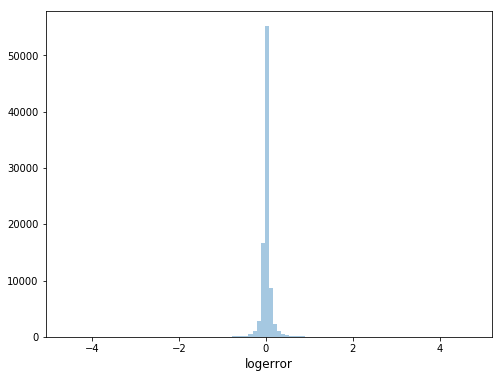

In [52]:
# Analysis log error -- label 
plt.figure(figsize=(8,6))
sns.distplot(train_df.logerror.values, bins=100, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

# From the below fig, we can see there is a normal distribution on the log error 

In [ ]:
# Analysis trainsaction date
train_df['transaction_month'] = train_df['transactiondate'].dt.month
cnt_srs = train_df['transaction_month'].value_counts()
plt.subplot(2,2,1)
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

train_df['transaction_week'] = train_df['transactiondate'].dt.weekday
cnt_srs = train_df['transaction_week'].value_counts()
plt.subplot(2,2,3)
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xticks(rotation='vertical')
plt.xlabel('Week of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()


From the below figs, we can see that there is a significant difference in the number of occurrences. 
Besides, at the end of year and week, the number of occurrences is quite low.

In [53]:
# Analysis ID
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64